In [15]:
import os
import sys 
sys.path.append(os.path.abspath('..'))
import matplotlib.pyplot as plt
from utils import create_directory, plot_simulations, plot_training_log, window_average
import json
import numpy as np
from model import test
from pathlib import Path


In [34]:
data_dir = create_directory(directory_name='try1')

model_num = 3
model_name = "model{:02d}".format(model_num)
phase: int = 5
ff_coefficient = float(str(0))

weight_file = os.path.join(data_dir, f"{model_name}_phase={phase}_FFCoef={ff_coefficient}_weights")
log_file = os.path.join(data_dir, f"{model_name}_phase={phase}_FFCoef={ff_coefficient}_log.json")
cfg_file = os.path.join(data_dir, f"{model_name}_phase={phase}_FFCoef={ff_coefficient}_cfg.json")

Directory '/Users/mahdiyarshahbazi/Documents/Data/try1' already exists.


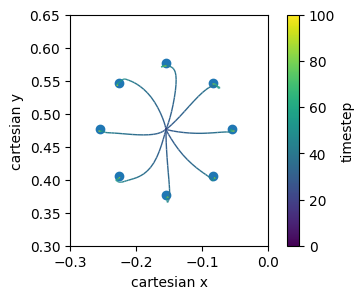

In [35]:
xy, tg = test(cfg_file,weight_file,ff_coefficient=0)
plot_simulations(xy=xy, target_xy=tg)

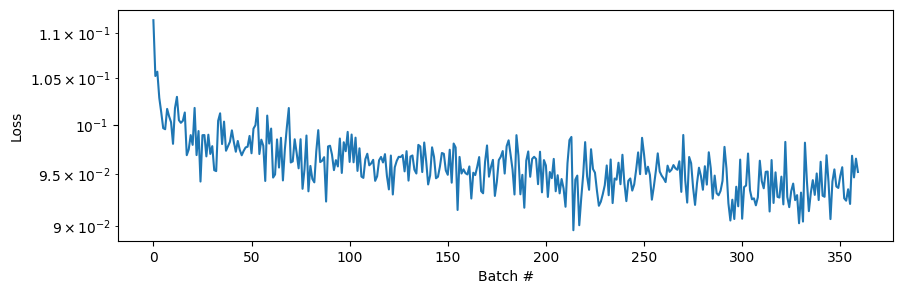

In [12]:
# retrieve and plot training history
with open(log_file,'r') as file:
    loaded_training_log = json.load(file)

fig = plt.figure(figsize=(10,3))
loaded_training_log = window_average(np.array(loaded_training_log),w=50)
ax = plot_training_log(log=loaded_training_log)

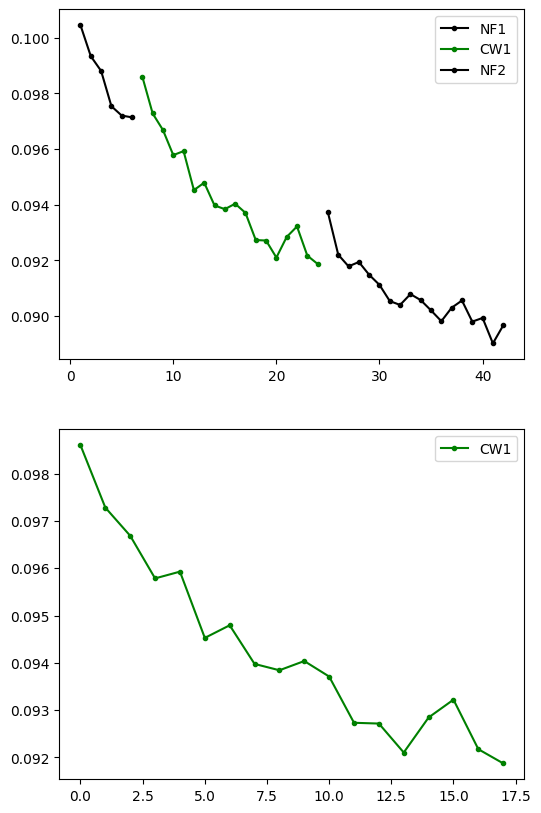

In [28]:
log_file1 = list(Path(data_dir).glob(f'{model_name}_phase={3}_*_log.json'))[0]
log_file2 = list(Path(data_dir).glob(f'{model_name}_phase={4}_*_log.json'))[0]
log_file3 = list(Path(data_dir).glob(f'{model_name}_phase={5}_*_log.json'))[0]
#log_file4 = list(Path(data_dir).glob(f'{model_name}_phase={6}_*_log.json'))[0]

position_loss_NF1 = np.array(json.load(open(log_file1, 'r')))
position_loss_FF1 = np.array(json.load(open(log_file2, 'r')))
position_loss_NF2 = np.array(json.load(open(log_file3, 'r')))
#position_loss_FF2 = np.array(json.load(open(log_file4, 'r')))

w = 1000
NF1w = window_average(position_loss_NF1,w)
FF1w = window_average(position_loss_FF1,w)
NF2w = window_average(position_loss_NF2,w)
#FF2w = window_average(position_loss_FF2,w)

x1w = np.arange(1,np.shape(NF1w)[0]+1)
x2w = np.arange(1,np.shape(FF1w)[0]+1) + x1w[-1]
x3w = np.arange(1,np.shape(NF2w)[0]+1) + x2w[-1]
#x4w = np.arange(1,np.shape(FF2w)[0]+1) + x3w[-1]

#np.savez('savings2.npz', NF1w, FF1w, NF2w, FF2w, x1w, x2w, x3w, x4w)
fig,ax = plt.subplots(2,1,figsize=(6,10))
l1, = ax[0].plot(x1w,NF1w,'k.-')
l2, = ax[0].plot(x2w,FF1w,'g.-')
l3, = ax[0].plot(x3w,NF2w,'k.-')
#l4, = ax[0].plot(x4w,FF2w,'r.-')
#ax[0].legend([l1,l2,l3,l4],['NF1','CW1','NF2','CW2'])
ax[0].legend([l1,l2,l3],['NF1','CW1','NF2'])


l2, = ax[1].plot(FF1w,'g.-')
#l4, = ax[1].plot(FF2w,'r.-')
#ax[1].legend([l2,l4],['CW1','CW2'])
ax[1].legend([l2],['CW1'])


In [ ]:
w = 50
NF1w = window_average(position_loss_NF1,w)
FF1w = window_average(position_loss_FF1,w)
NF2w = window_average(position_loss_NF2,w)
#FF2w = window_average(position_loss_FF2,w)

x1w = np.arange(1,np.shape(NF1w)[0]+1)
x2w = np.arange(1,np.shape(FF1w)[0]+1) + x1w[-1]
x3w = np.arange(1,np.shape(NF2w)[0]+1) + x2w[-1]
#x4w = np.arange(1,np.shape(FF2w)[0]+1) + x3w[-1]


fig,ax = plt.subplots(2,1,figsize=(6,10))
l1, = ax[0].plot(x1w,NF1w,'k.-')
l2, = ax[0].plot(x2w,FF1w,'g.-')
l3, = ax[0].plot(x3w,NF2w,'k.-')
l4, = ax[0].plot(x4w,FF2w,'r.-')
ax[0].legend([l1,l2,l3,l4],['NF1','CW1','NF2','CW2'])

l2, = ax[1].plot(FF1w,'g.-')
l4, = ax[1].plot(FF2w,'r.-')
ax[1].legend([l2,l4],['CW1','CW2'])